# Goals
- Increase enrolment of students
- Improve retention, progression and graduation rates
- Recruite better academically qualified undergraduate and graduate students
- Increase external funding and recognition
# Business Questions
- Identify key drivers of early student attrition
- Build a predictive model to identify students with high early attrition risk
- Recommend appropriate interventions based on the analysis
> Early attrition is defined as students drop out within one year of successfully joining the program (completed admission process)
# Deliverables
Besided the well documented code, powerpoint report should outline and summarize the following :
- Exploratory data analysis showing key associations
- Segment analysis showing key drivers of attrition
- Results of statistical modelling along with business interpretations and recommended interventions

In [217]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [218]:
# Getting the filepath
pwd = os.getcwd()
filepath = os.path.join(os.path.dirname(pwd),"input\\Student Applications & Performance.xlsx")

In [219]:
# Loading the data
df = pd.read_excel(filepath,sheet_name="University information")
df.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [220]:
df.shape

(3400, 56)

In [221]:
df_cp = df.copy()
# for when we make changes to this data

In [222]:
# import sweetviz as sv
# clear_report = sv.analyze(df)
# clear_report.show_html('clear_report.html')

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 9   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 10  STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 11  FIRST_TERM                3400 non-null   int64  
 12  CORE_COURSE_NAME_1_F      3400 non-null   object 
 13  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 14  CORE_COU

In [224]:
df.isnull().sum()
# there is considerable amount of missing values. We might have to drop those columns later on

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

In [225]:
df.describe()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
count,3.400000e+03,3400.000000,1106.000000,2492.000000,2882.000000,3400.000000,3400.000000,3400.000000,3375.000000,3347.000000,2968.000000,2911.000000,3400.000000,3400.000000,3194.000000,3191.000000,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03
mean,7.897155e+06,17.994118,20.660036,965.092295,997.758501,200777.000000,200871.000000,0.787353,99.825185,3.202738,2.560647,2.571281,13.985882,12.205000,14.285848,12.511125,3.034025e+05,5.515335e+05,3.446899e+05,7.222052e+04
std,8.083421e+04,0.552052,3.234734,209.088633,156.268221,170.001298,170.001298,0.409240,235.196984,0.455337,0.681273,0.611729,1.554286,2.986294,2.104387,3.470492,4.836255e+05,6.064403e+05,7.871878e+05,2.795679e+05
min,7.755837e+06,16.000000,8.000000,350.000000,530.000000,200508.000000,200602.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.212072e+06
25%,7.827039e+06,18.000000,18.000000,900.000000,910.000000,200608.000000,200702.000000,1.000000,69.000000,2.870000,2.000000,2.000000,13.000000,11.000000,13.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.899052e+06,18.000000,20.000000,990.000000,990.000000,200808.000000,200902.000000,1.000000,69.000000,3.200000,3.000000,3.000000,14.000000,13.000000,14.000000,13.000000,0.000000e+00,1.505400e+05,0.000000e+00,0.000000e+00
75%,7.964008e+06,18.000000,22.000000,1100.000000,1110.000000,200908.000000,201002.000000,1.000000,138.000000,3.560000,3.000000,3.000000,15.000000,15.000000,16.000000,15.000000,5.995800e+05,1.192815e+06,3.241800e+05,1.876155e+05
max,8.037098e+06,26.000000,32.000000,1490.000000,1510.000000,201008.000000,201102.000000,1.000000,5932.000000,4.000000,4.000000,4.000000,21.000000,21.000000,23.000000,23.000000,2.124900e+06,2.124900e+06,5.999940e+06,1.632660e+06


In [226]:
df['RETURNED_2ND_YR'].value_counts()

1    2677
0     723
Name: RETURNED_2ND_YR, dtype: int64

In [227]:
# Renaming target feature
df['Target'] = df['RETURNED_2ND_YR']
df.drop('RETURNED_2ND_YR',axis=1,inplace=True)

df['Target'].value_counts(normalize=True)*100
# It is an imbalanced data

1    78.735294
0    21.264706
Name: Target, dtype: float64

In [228]:
# Swapping 1&0 in Target so 1 represents students who discontinued 
df['Target'] = df['Target'].map(lambda x: 0 if x==1 else 1)
df['Target'].value_counts()

0    2677
1     723
Name: Target, dtype: int64

# EDA
## Target 

In [229]:
# Imbalanced target
df['Target'].value_counts(normalize=True)*100

0    78.735294
1    21.264706
Name: Target, dtype: float64

Text(0.5, 1.0, 'Bar plot')

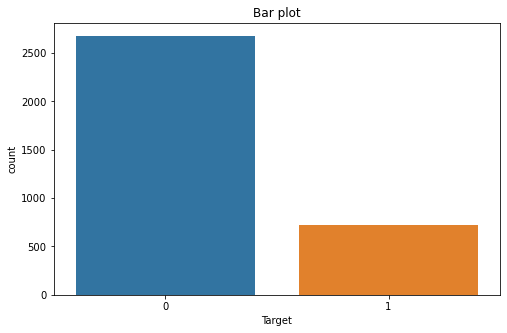

In [230]:
plt.figure(figsize=(8,5))

sns.countplot(data=df,x='Target')
plt.title('Bar plot')
# We may need to synthetically balance the dataset.

## Student identifier

In [231]:
df['STUDENT IDENTIFIER'].nunique()
# insignificant variable

3400

## Student age

In [232]:
df['STDNT_AGE'].describe()
# IQR method will not be possible as Q1,Q2,Q3 are all the same

count    3400.000000
mean       17.994118
std         0.552052
min        16.000000
25%        18.000000
50%        18.000000
75%        18.000000
max        26.000000
Name: STDNT_AGE, dtype: float64

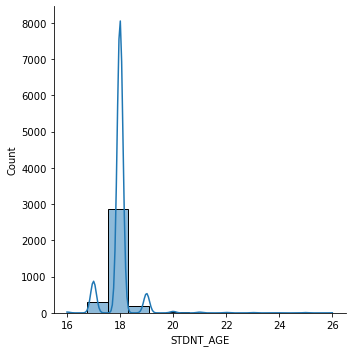

In [233]:
sns.displot(data=df,x='STDNT_AGE',kde=True)

Text(0.5, 1.0, 'Count of age group w.r.t attrition')

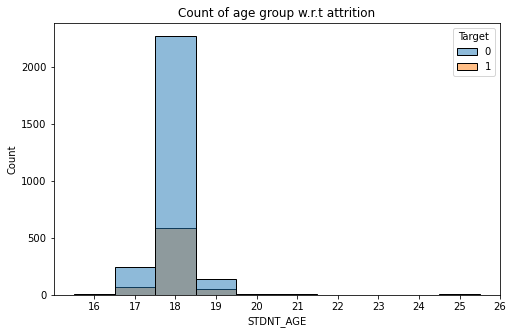

In [234]:
plt.figure(figsize=(8,5))

sns.histplot(data=df,x='STDNT_AGE',hue='Target',binwidth=1)
plt.xticks(ticks=np.arange(16.5,27.5,1),labels=np.arange(16,27))
plt.title('Count of age group w.r.t attrition')

<AxesSubplot:xlabel='STDNT_AGE'>

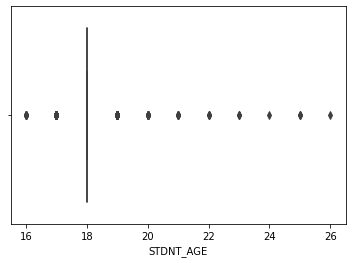

In [235]:
# outliers in age group 
sns.boxplot(x=df['STDNT_AGE'])

In [236]:
df['STDNT_AGE'].value_counts()

18    2860
17     309
19     190
20      14
16       8
21       7
22       4
23       3
25       3
24       1
26       1
Name: STDNT_AGE, dtype: int64

## Student gender

In [237]:
df['STDNT_GENDER'].value_counts()

F    2140
M    1260
Name: STDNT_GENDER, dtype: int64

In [238]:
df['STDNT_GENDER'].value_counts(normalize=True)*100
# Female students are greater than male students

F    62.941176
M    37.058824
Name: STDNT_GENDER, dtype: float64

<AxesSubplot:xlabel='STDNT_GENDER', ylabel='count'>

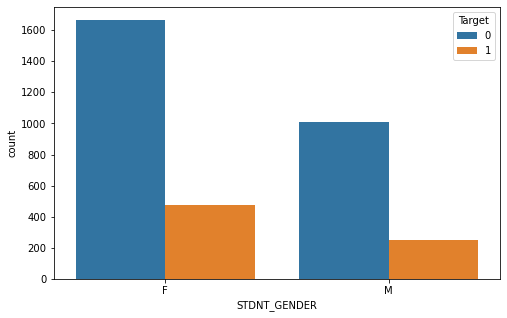

In [239]:
plt.figure(figsize=(8,5))

sns.countplot(data=df,x='STDNT_GENDER',hue='Target')

# Females tend to attrite more than males

## Student Background

In [240]:
df['STDNT_BACKGROUND'].value_counts()
# Most of them are from BGD 1

BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: STDNT_BACKGROUND, dtype: int64

In [241]:
pd.crosstab(index=df['STDNT_BACKGROUND'],columns=df['Target'],normalize='index')
# Students from BGD 5 have equal chance of attrition, however we cannot confirm this since the available data is very low

Target,0,1
STDNT_BACKGROUND,,
BGD 1,0.770893,0.229107
BGD 2,0.773585,0.226415
BGD 3,0.820486,0.179514
BGD 4,0.812950,0.187050
BGD 5,0.500000,0.500000
BGD 6,0.851064,0.148936
BGD 7,0.631579,0.368421
BGD 8,0.800000,0.200000


<AxesSubplot:xlabel='STDNT_BACKGROUND', ylabel='count'>

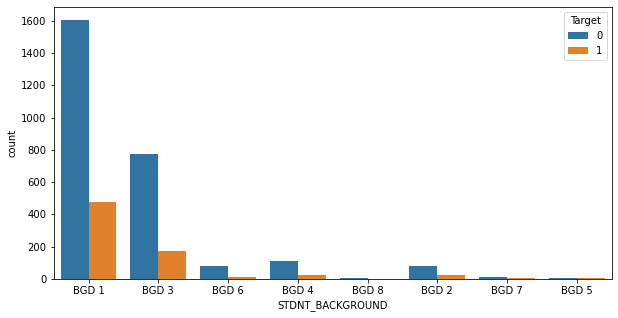

In [242]:
plt.figure(figsize=(10,5))

sns.countplot(data=df,x='STDNT_BACKGROUND',hue=df['Target'])

# lot of students are from BGD1, attrition is also more in BGD 1

## IN_STATE_FLAG

In [243]:
df['IN_STATE_FLAG'].value_counts()
# Most of the students are from the same state as university, naturally.

Y    3063
N     337
Name: IN_STATE_FLAG, dtype: int64

In [244]:
pd.crosstab(df['IN_STATE_FLAG'],df['Target'],normalize='index')
# Students attrited proportionally in or outside the state

Target,0,1
IN_STATE_FLAG,,
N,0.735905,0.264095
Y,0.793013,0.206987


## International status

In [245]:
df['INTERNATIONAL_STS'].value_counts(normalize=True)*100
# Very slim number of students are international

N    99.205882
Y     0.794118
Name: INTERNATIONAL_STS, dtype: float64

In [246]:
pd.crosstab(df['INTERNATIONAL_STS'],df['Target'],normalize='index')

Target,0,1
INTERNATIONAL_STS,,
N,0.789208,0.210792
Y,0.555556,0.444444


Text(0.5, 1.0, 'count of int students w.r.t attrition')

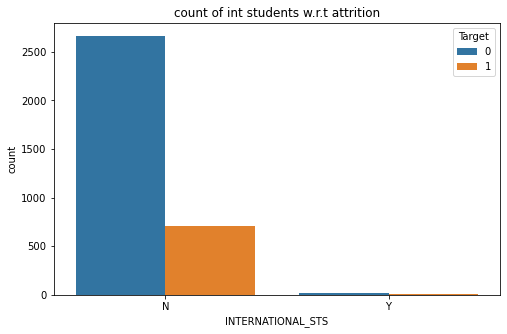

In [247]:
plt.figure(figsize=(8,5))

sns.countplot(data=df,x='INTERNATIONAL_STS',hue='Target')
plt.title('count of int students w.r.t attrition')
# Many are from the state and many have left the course
# This variable may be insignificant due to the very low number of international students

## Student major

In [248]:
df['STDNT_MAJOR'].value_counts()
# Many of the students have not declared their majors

Undeclared                        460
Biology                           362
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                                75
Management                         72
Communication                      70
Political Science                  64
Chemistry                          64
English Language/Literature        60
Engineering Studies                60
Marketing                          59
Computer Science - Systems         58
Accounting                         54
Health Science                     48
Computer Science - Games           40
Joint Enrollment - Accel           35
History     

In [249]:
pd.crosstab(df['STDNT_MAJOR'],df['Target'])

Target,0,1
STDNT_MAJOR,,
Accounting,42,12
Applied Computer Science,27,5
Art,57,18
Art Education,7,2
Biology,280,82
Biology and Secondary Ed,2,3
Chemistry,54,10
Chemistry and Secondary Ed,2,0
Communication,56,14


<AxesSubplot:xlabel='count', ylabel='STDNT_MAJOR'>

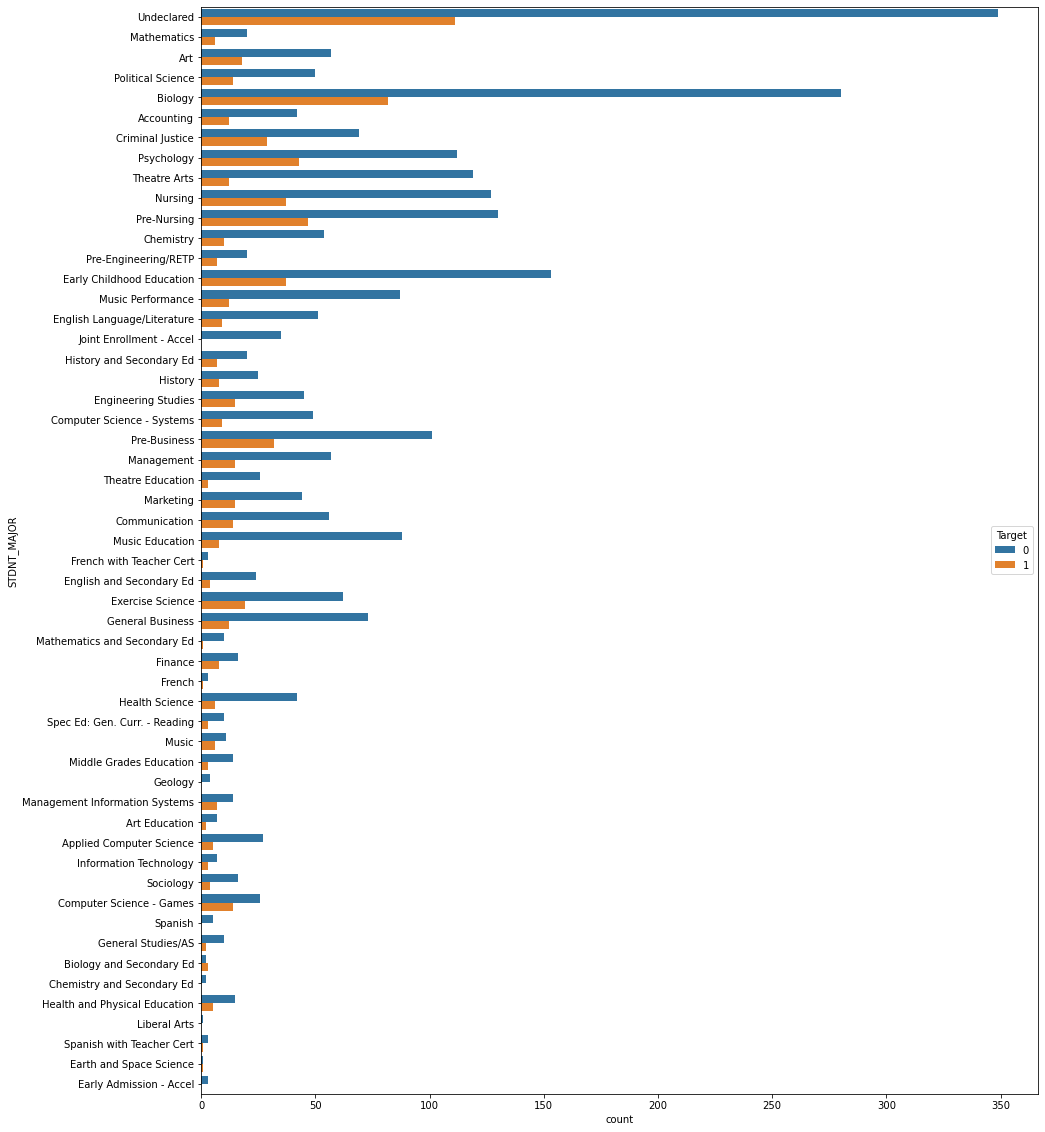

In [250]:
plt.figure(figsize=(15,20))
sns.countplot(data=df,y='STDNT_MAJOR',hue='Target')

## Student minor

In [251]:
df['STDNT_MINOR'].value_counts(normalize=True)*100
# 93% of the students have no minors

N                                92.941176
Spanish                           0.764706
Music                             0.558824
Psychology                        0.558824
Foundations of Business           0.441176
Communication                     0.411765
History                           0.382353
Criminal Justice                  0.352941
Theatre Arts                      0.352941
Computer Science - Systems        0.294118
Early Childhood Education         0.264706
Mathematics                       0.205882
Professional Writing              0.176471
Marketing                         0.176471
Art History                       0.176471
Sociology                         0.147059
Art                               0.147059
English Language/Literature       0.147059
French                            0.117647
Accounting                        0.117647
Chemistry                         0.117647
Biology                           0.117647
Political Science                 0.117647
Internation

In [252]:
pd.crosstab(df['STDNT_MINOR'],df['Target'])
# We can ignore this feature

Target,0,1
STDNT_MINOR,,
Accounting,3,1
African Studies,2,0
Anthropology,2,0
Art,3,2
Art History,4,2
Asian Studies,2,0
Biology,3,1
Chemistry,4,0
Communication,13,1


## Entrance test

In [253]:
df[['STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2','STDNT_TEST_ENTRANCE_COMB']].isnull().sum()
# Both Entrance 1&2 have large number of missing values.
# Hence we should only consider the combined test variable

STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
dtype: int64

<AxesSubplot:xlabel='STDNT_TEST_ENTRANCE_COMB', ylabel='Density'>

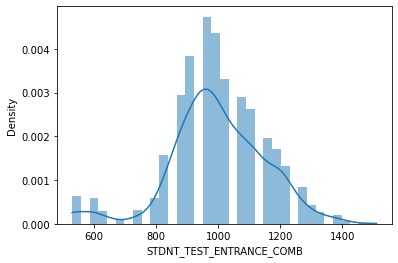

In [254]:
sns.histplot(df['STDNT_TEST_ENTRANCE_COMB'],kde=True, stat="density", linewidth=0)

Text(0.5, 1.0, 'Count of STDNT_TEST_ENTRANCE_COMB group w.r.t Attrition')

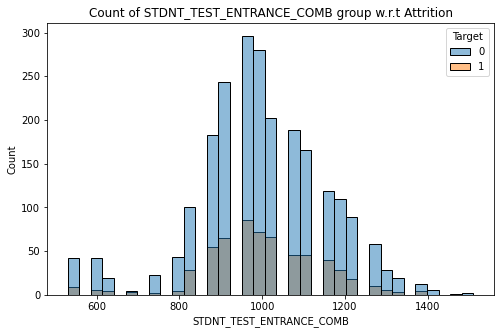

In [255]:
plt.figure(figsize=(8,5))

sns.histplot(data=df,x='STDNT_TEST_ENTRANCE_COMB',hue='Target')
plt.title('Count of STDNT_TEST_ENTRANCE_COMB group w.r.t Attrition')

<AxesSubplot:xlabel='STDNT_TEST_ENTRANCE_COMB'>

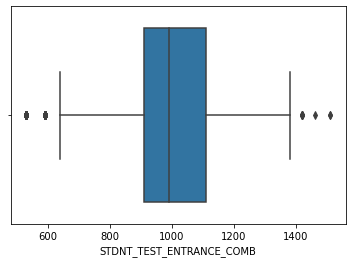

In [256]:
sns.boxplot(data=df,x='STDNT_TEST_ENTRANCE_COMB')
# There are outliers in this variable

## First Term

In [257]:
df['FIRST_TERM'].value_counts()
# It has values ranging from the year 2005-2010

200908    676
201008    632
200808    581
200708    521
200608    497
200508    493
Name: FIRST_TERM, dtype: int64

In [258]:
pd.crosstab(df['FIRST_TERM'],df['Target'],normalize='index')*100
# Nearly proportional relation with exception on 2006

Target,0,1
FIRST_TERM,,
200508,78.498986,21.501014
200608,84.305835,15.694165
200708,78.694818,21.305182
200808,77.280551,22.719449
200908,76.923077,23.076923
201008,77.848101,22.151899


## Couse names & Course grades

In [259]:
df[['CORE_COURSE_NAME_1_F',
 'CORE_COURSE_GRADE_1_F',
 'CORE_COURSE_NAME_2_F',
 'CORE_COURSE_GRADE_2_F',
 'CORE_COURSE_NAME_3_F',
 'CORE_COURSE_GRADE_3_F',
 'CORE_COURSE_NAME_4_F',
 'CORE_COURSE_GRADE_4_F',
 'CORE_COURSE_NAME_5_F',
 'CORE_COURSE_GRADE_5_F',
 'CORE_COURSE_NAME_6_F',
 'CORE_COURSE_GRADE_6_F',]].isnull().sum()
# We can't keep most of the variables 

CORE_COURSE_NAME_1_F        0
CORE_COURSE_GRADE_1_F       0
CORE_COURSE_NAME_2_F       99
CORE_COURSE_GRADE_2_F      99
CORE_COURSE_NAME_3_F      565
CORE_COURSE_GRADE_3_F     565
CORE_COURSE_NAME_4_F     1597
CORE_COURSE_GRADE_4_F    1597
CORE_COURSE_NAME_5_F     2755
CORE_COURSE_GRADE_5_F    2755
CORE_COURSE_NAME_6_F     3272
CORE_COURSE_GRADE_6_F    3272
dtype: int64

In [260]:
df[['CORE_COURSE_NAME_1_F',
 'CORE_COURSE_GRADE_1_F',
 'CORE_COURSE_NAME_2_F',
 'CORE_COURSE_GRADE_2_F',
 'CORE_COURSE_NAME_3_F',
 'CORE_COURSE_GRADE_3_F',
 'CORE_COURSE_NAME_4_F',
 'CORE_COURSE_GRADE_4_F',
 'CORE_COURSE_NAME_5_F',
 'CORE_COURSE_GRADE_5_F',
 'CORE_COURSE_NAME_6_F',
 'CORE_COURSE_GRADE_6_F',]].head()
# We can keep the grades and drop course names

,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F
0,ANTH 1105,A,ARTH 1100,A,ENGL 1102,A,PSYC 1101,A,NaN,NaN,NaN,NaN
1,ANTH 1105,A,GERM 1002,A,ITDS 2735,A,MATH 1125,A,THEA 1100,A,POLS 1101,A
2,ANTH 1105,A,ENGL 1101,A,HIST 2111,A,MATH 1111,A,SOCI 1101,A,NaN,NaN
3,ANTH 1107,A,COMM 1110,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANTH 1107,A,ARTH 1100,A,CPSC 1105,A,MATH 1111,A,NaN,NaN,NaN,NaN


In [261]:
pd.concat([df['CORE_COURSE_GRADE_1_F'],
   df['CORE_COURSE_GRADE_2_F'],
   df['CORE_COURSE_GRADE_3_F'],
   df['CORE_COURSE_GRADE_4_F'],
   df['CORE_COURSE_GRADE_5_F'],
   df['CORE_COURSE_GRADE_6_F']]).value_counts()

B          4100
A          3905
C          2402
D           966
F           595
NOT REP     109
INCOMPL      35
dtype: int64

## Second Term

In [262]:
df['SECOND_TERM'].value_counts()
# It has values ranging from the year 2006-2010

201002    676
201102    632
200902    581
200802    521
200702    497
200602    493
Name: SECOND_TERM, dtype: int64

In [263]:
pd.crosstab(df['SECOND_TERM'],df['Target'],normalize='index')*100
# nearly proportional relation between year and attrition, with exception on 2007

Target,0,1
SECOND_TERM,,
200602,78.498986,21.501014
200702,84.305835,15.694165
200802,78.694818,21.305182
200902,77.280551,22.719449
201002,76.923077,23.076923
201102,77.848101,22.151899


## Course names & Course grades

In [264]:
df[['CORE_COURSE_NAME_1_S',
 'CORE_COURSE_GRADE_1_S',
 'CORE_COURSE_NAME_2_S',
 'CORE_COURSE_GRADE_2_S',
 'CORE_COURSE_NAME_3_S',
 'CORE_COURSE_GRADE_3_S',
 'CORE_COURSE_NAME_4_S',
 'CORE_COURSE_GRADE_4_S',
 'CORE_COURSE_NAME_5_S',
 'CORE_COURSE_GRADE_5_S',
 'CORE_COURSE_NAME_6_S',
 'CORE_COURSE_GRADE_6_S']].isnull().sum()
# Most of these variables are unusable
# We can think of dropping them all together or getting just the grades like we did in first term

CORE_COURSE_NAME_1_S      157
CORE_COURSE_GRADE_1_S     232
CORE_COURSE_NAME_2_S      439
CORE_COURSE_GRADE_2_S     439
CORE_COURSE_NAME_3_S     1038
CORE_COURSE_GRADE_3_S    1038
CORE_COURSE_NAME_4_S     2045
CORE_COURSE_GRADE_4_S    2045
CORE_COURSE_NAME_5_S     2950
CORE_COURSE_GRADE_5_S    2950
CORE_COURSE_NAME_6_S     3319
CORE_COURSE_GRADE_6_S    3319
dtype: int64

## Housing status

In [265]:
df['HOUSING_STS'].value_counts()
# slightly more number of students staying outside campus

Off Campus    1981
On Campus     1419
Name: HOUSING_STS, dtype: int64

In [266]:
pd.crosstab(df['HOUSING_STS'],df['Target'],normalize='index')*100

Target,0,1
HOUSING_STS,,
Off Campus,80.363453,19.636547
On Campus,76.462297,23.537703


Text(0.5, 1.0, 'Students housing status w.r.t attrition')

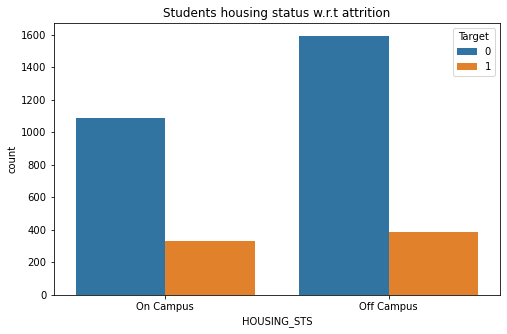

In [267]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x=df['HOUSING_STS'],hue=df['Target'])
plt.title("Students housing status w.r.t attrition")

## Distance from home

<AxesSubplot:xlabel='DISTANCE_FROM_HOME', ylabel='Density'>

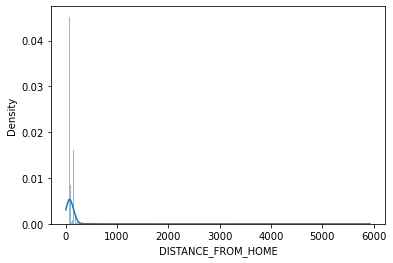

In [268]:
sns.histplot(df['DISTANCE_FROM_HOME'],kde=True, stat="density", linewidth=0)
# Values are within 1000

<AxesSubplot:xlabel='DISTANCE_FROM_HOME'>

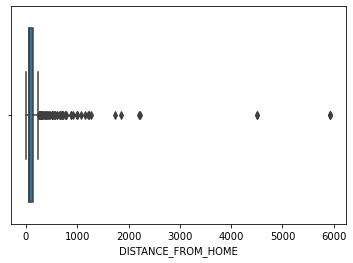

In [269]:
sns.boxplot(data=df,x='DISTANCE_FROM_HOME')
# There are outliers

## High school GPA

In [270]:
df['HIGH_SCHL_GPA'].describe()

count    3347.000000
mean        3.202738
std         0.455337
min         0.000000
25%         2.870000
50%         3.200000
75%         3.560000
max         4.000000
Name: HIGH_SCHL_GPA, dtype: float64

<AxesSubplot:xlabel='HIGH_SCHL_GPA', ylabel='Density'>

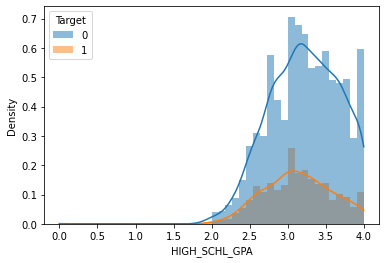

In [271]:
sns.histplot(data=df,
             x='HIGH_SCHL_GPA',
             kde=True, stat="density",
             linewidth=0,
             color="red",
             hue='Target')
# Attrition seems to be proportional to high school GPA

## High school name

In [272]:
df['HIGH_SCHL_NAME'].value_counts()

SCHOOL 11     249
SCHOOL 130    245
SCHOOL 10     238
SCHOOL 1      209
SCHOOL 2      129
             ... 
SCHOOL 185      1
SCHOOL 498      1
SCHOOL 375      1
SCHOOL 433      1
SCHOOL 329      1
Name: HIGH_SCHL_NAME, Length: 439, dtype: int64

In [273]:
df['HIGH_SCHL_NAME'].nunique()

439

## Father's education

In [274]:
df['FATHER_HI_EDU_CD'].value_counts()

2.0    1336
3.0    1309
4.0     226
1.0      97
Name: FATHER_HI_EDU_CD, dtype: int64

In [275]:
df['FATHER_HI_EDU_DESC'].value_counts()
# Since they both are giving the same information, one of them is redundant
# We can remove any one of them 

High School                  1336
College/Beyond               1309
No Information                432
Other/Unknown                 226
Middle School/Junior High      97
Name: FATHER_HI_EDU_DESC, dtype: int64

In [276]:
df['FATHER_HI_EDU_DESC'].isnull().sum()

0

In [277]:
pd.crosstab(df['FATHER_HI_EDU_DESC'],df['Target'],normalize='index')*100

Target,0,1
FATHER_HI_EDU_DESC,,
College/Beyond,80.366692,19.633308
High School,78.368263,21.631737
Middle School/Junior High,73.195876,26.804124
No Information,76.157407,23.842593
Other/Unknown,78.761062,21.238938


## Mother's education

In [278]:
df['MOTHER_HI_EDU_CD'].value_counts()

3.0    1500
2.0    1223
4.0     117
1.0      71
Name: MOTHER_HI_EDU_CD, dtype: int64

In [279]:
df['MOTHER_HI_EDU_DESC'].value_counts()
# It is the same as in father's education
# We can keep one of them 

College/Beyond               1500
High School                  1223
No Information                489
Other/Unknown                 117
Middle School/Junior High      71
Name: MOTHER_HI_EDU_DESC, dtype: int64

In [280]:
pd.crosstab(df['MOTHER_HI_EDU_DESC'],df['Target'])

Target,0,1
MOTHER_HI_EDU_DESC,,
College/Beyond,1199,301
High School,958,265
Middle School/Junior High,55,16
No Information,366,123
Other/Unknown,99,18


## Degree enrolled in 

In [281]:
df['DEGREE_GROUP_CD'].value_counts()

B    3384
A      12
V       4
Name: DEGREE_GROUP_CD, dtype: int64

In [282]:
df['DEGREE_GROUP_DESC'].value_counts()
# We can drop one of them 

Bachelors           3384
Associate             12
Career Associate       4
Name: DEGREE_GROUP_DESC, dtype: int64

In [283]:
pd.crosstab(df['DEGREE_GROUP_DESC'],df['Target'])
# Most of the students are enrolled in Bachelors and most of the attrition is from Bachelors

Target,0,1
DEGREE_GROUP_DESC,,
Associate,10,2
Bachelors,2664,720
Career Associate,3,1


## Attempt vs Earned

In [284]:
df[['FIRST_TERM_ATTEMPT_HRS','FIRST_TERM_EARNED_HRS']].isnull().sum()

FIRST_TERM_ATTEMPT_HRS    0
FIRST_TERM_EARNED_HRS     0
dtype: int64

In [285]:
df[['SECOND_TERM_ATTEMPT_HRS','SECOND_TERM_EARNED_HRS']].isnull().sum()

SECOND_TERM_ATTEMPT_HRS    206
SECOND_TERM_EARNED_HRS     209
dtype: int64

In [286]:
df['FIRST_TERM_ATTEMPT_HRS']-df['FIRST_TERM_EARNED_HRS']
# We can use the difference between them to know how much student has fallen short same with second term

0       0
1       0
2       0
3       0
4       0
       ..
3395    0
3396    4
3397    8
3398    3
3399    3
Length: 3400, dtype: int64

## Financial need

<AxesSubplot:xlabel='GROSS_FIN_NEED', ylabel='Count'>

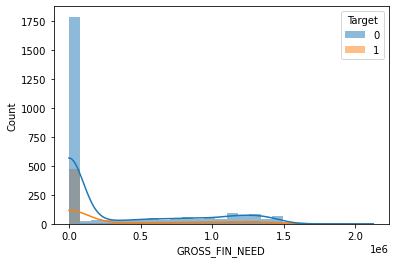

In [287]:
sns.histplot(data=df,x='GROSS_FIN_NEED',kde='True',linewidth=0,hue='Target')

## Course fees

<AxesSubplot:xlabel='COST_OF_ATTEND', ylabel='Count'>

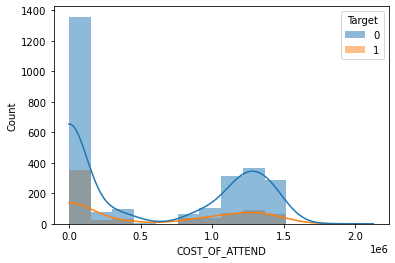

In [288]:
sns.histplot(data=df,x='COST_OF_ATTEND',kde='True',linewidth=0,hue='Target')

## Family contribution

<AxesSubplot:xlabel='EST_FAM_CONTRIBUTION', ylabel='Count'>

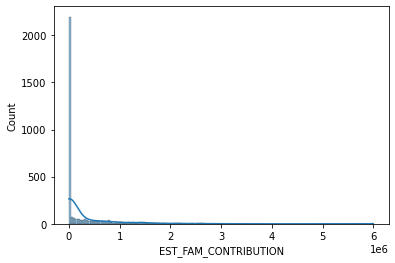

In [289]:
sns.histplot(data=df,x='EST_FAM_CONTRIBUTION',kde='True')

## Unmet needs

<AxesSubplot:xlabel='UNMET_NEED', ylabel='Count'>

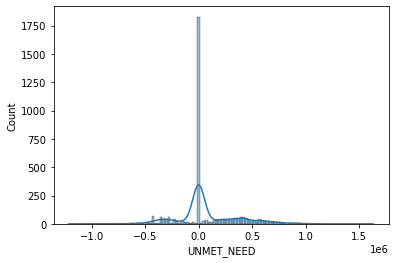

In [290]:
sns.histplot(data=df,x='UNMET_NEED',kde='True')

# Feature engineering

In [292]:
columns_to_remove = ['STUDENT IDENTIFIER', #since it serves no purpose
                    'STDNT_TEST_ENTRANCE1', #since both entrance 1&2 have large missing values
                    'STDNT_TEST_ENTRANCE2', #and since the same information is captured in the combined variable
                    'FATHER_HI_EDU_CD', #redundant as FATHER_HI_EDU_DESC serves the same purpose
                    'MOTHER_HI_EDU_CD', #redundant as MOTHER_HI_EDU_DESC serves the same purpose
                    'DEGREE_GROUP_CD', #redundant as same information is captured in DEGREE_GROUP_DESC
                    'GROSS_FIN_NEED'] #same information is captured in UNMET_NEED
df.drop(columns_to_remove,axis=1,inplace=True)
df.columns

Index(['STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG',
       'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'CORE_COURSE_NAME_1_F',
       'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F',
       'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_5_F',
       'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_NAME_6_F',
       'CORE_COURSE_GRADE_6_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S',
       'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_NAME_4_S',
       'CORE_COURSE_GRADE_4_S', 'CORE_COURSE_NAME_5_S',
       'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_NAME_6_S',
       'CORE_COURSE_GRADE_6_S', 'HOUSING_STS', 'DISTANCE_FROM_HOME',
       'HIGH_SCHL_GPA', 'HIGH_SCHL_NAME', 'FATHER_HI_EDU_DESC',
       'MOTHER_HI_EDU_DESC', 'DE